In [37]:
%matplotlib inline
!pip install scikit-learn

import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("done")


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


done


In [16]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [17]:
df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].cat.codes


In [20]:
df['country'] = df['country'].astype('category')
df['country'] = df['country'].cat.codes
df 
df.dtypes #all numeric 

customer_id           int64
credit_score          int64
country                int8
gender                 int8
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [19]:
df.isnull().sum() # no null values

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: >

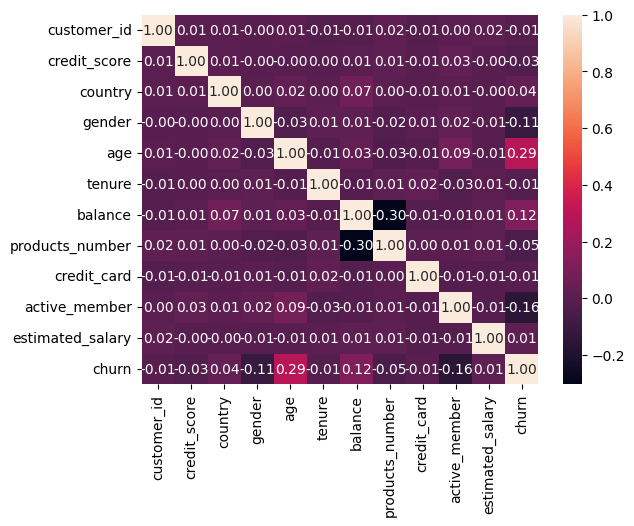

In [22]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# Model Considerations: 

It is important that I use training variable which logically will have impact on customer churn, such as; age, gender, member activity, balance and credit card (given the problem statement). Additionally, it is important to avoid  multicollinearity issues due to predictors used within the model correlating highly with other predictors. Hence the exclusion of product number from this analysis, given it's medium negative correlation score with products number (-0.30).

The objective of this Model is to use the following variables as part of <b>Multivariate Regression Analysis</b> to predict churn: 
#### - Gender
#### - Age
#### - Member Activity
#### - Balance
#### - Credit Card

In [28]:
X = df[['customer_id', 'gender', 'age', 'active_member', 'balance', 'credit_card']]
X

,customer_id,gender,age,active_member,balance,credit_card
0,15634602,0,42,1,0.00,1
1,15647311,0,41,1,83807.86,0
2,15619304,0,42,0,159660.80,1
3,15701354,0,39,0,0.00,0
4,15737888,0,43,1,125510.82,1
...,...,...,...,...,...,...
9995,15606229,1,39,0,0.00,1
9996,15569892,1,35,1,57369.61,1
9997,15584532,0,36,1,0.00,0
9998,15682355,1,42,0,75075.31,1


In [29]:
y = df['churn']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [80]:
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
c = lr.intercept_
c

-0.07686099202158608

In [82]:
m = lr.coef_
m

array([-6.25090207e-09, -7.67440359e-02,  1.11801477e-02, -1.32869859e-01,
        7.28941277e-07, -2.09147451e-03])

In [87]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([0.08922091, 0.18192554, 0.65878936, ..., 0.2558141 , 0.11510894,
       0.43900675])

In [84]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y_train, y_pred_train) # might not be suitable for categorical data? 

0.12970263724833364

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_test = lr.predict(X_test)

# Threshold of 0.5 used for birnary classification
threshold = 0.5
y_pred_test_binary = (y_pred_test > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_test_binary)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred_test_binary)
print("Confusion Matrix:\n", cm)

Accuracy: 0.796
Confusion Matrix:
 [[2333   46]
 [ 566   55]]


#### True Negatives (TN): 2333 cases were correctly predicted as not churned.
#### False Positives (FP): 46 cases were incorrectly predicted as churned (Type I error).
#### False Negatives (FN): 566 cases were incorrectly predicted as not churned (Type II error).
#### True Positives (TP): 55 cases were correctly predicted as churned.
<br>

Precision: Precision measures how many of the predicted positive cases (churned) are actually positive.

#### Precision = TP / (TP + FP) = 55 / (55 + 46) ≈ 0.544

This means about 54.4% of the customers predicted as churned actually churned.

Recall (Sensitivity): Recall measures how many of the actual positive cases (churned) were predicted correctly.

#### Recall = TP / (TP + FN) = 55 / (55 + 566) ≈ 0.088

This means the model identified only about 8.8% of all churned customers.

F1-Score: The F1-Score is the harmonic mean of precision and recall.

#### F1-Score = 2 * Precision * Recall / (Precision + Recall) ≈ 0.152
<br>

Clearly this model was not effective at predicting churn, so a better model for predicting categorical target variables such as churn might be to use a Logistic Regression Model. This will allow me to pass predictor variables into the model so that a definitive 0 (no churn) or 1 (churn) can be outputted for each given customer - this avoids the need for a threshold. 

In [190]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df = pd.get_dummies(df, drop_first=True)
df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [191]:
X = df[['gender_Male', 'age', 'active_member', 'balance', 'credit_card', 'churn']]
X

,gender_Male,age,active_member,balance,credit_card,churn
0,0,42,1,0.00,1,1
1,0,41,1,83807.86,0,0
2,0,42,0,159660.80,1,1
3,0,39,0,0.00,0,0
4,0,43,1,125510.82,1,0
...,...,...,...,...,...,...
9995,1,39,0,0.00,1,0
9996,1,35,1,57369.61,1,0
9997,0,36,1,0.00,0,1
9998,1,42,0,75075.31,1,1


In [192]:
y = X['churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [195]:
X = X.drop('churn', axis=1, inplace=True)
X

KeyError: "['churn'] not found in axis"

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [220]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train_scaled, y_train)

y_pred_test = LogReg.predict(X_test_scaled)

In [221]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

# Precision
precision = precision_score(y_test, y_pred_test)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred_test)
print(f"F1-Score: {f1}")

Accuracy: 0.8036666666666666
Confusion Matrix:
[[2304   75]
 [ 514  107]]
Precision: 0.5879120879120879
Recall: 0.1723027375201288
F1-Score: 0.26650062266500624


Model still not effectively identifying specifically customers who have churned. This is concerning and needs to be further refined to minimise this recall error. 

In [239]:
LogReg = LogisticRegression(max_iter=1000, class_weight='balanced')

LogReg.fit(X_train_scaled, y_train)
y_pred_test = LogReg.predict(X_test_scaled)

C:\Users\LiamB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [223]:
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

# Precision
precision = precision_score(y_test, y_pred_test)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred_test)
print(f"F1-Score: {f1}")

Accuracy: 0.702
Confusion Matrix:
[[1660  719]
 [ 175  446]]
Precision: 0.3828326180257511
Recall: 0.7181964573268921
F1-Score: 0.49944008958566627


Model has improved significantly with respect to recall, at the sacrafice of precision (to be expected). Let's try simply using more predictor variables from the datset.

In [242]:
X = df[['gender_Male', 'age', 'active_member', 'balance', 'credit_card', 'credit_score', 'tenure', 'products_number']]
y = df[['churn']]

,gender_Male,age,active_member,balance,credit_card,credit_score,tenure,products_number
0,0,42,1,0.00,1,619,2,1
1,0,41,1,83807.86,0,608,1,1
2,0,42,0,159660.80,1,502,8,3
3,0,39,0,0.00,0,699,1,2
4,0,43,1,125510.82,1,850,2,1
...,...,...,...,...,...,...,...,...
9995,1,39,0,0.00,1,771,5,2
9996,1,35,1,57369.61,1,516,10,1
9997,0,36,1,0.00,0,709,7,1
9998,1,42,0,75075.31,1,772,3,2


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [238]:
LogReg = LogisticRegression(max_iter=1000, class_weight='balanced')
LogReg.fit(X_train_scaled, y_train)

y_pred_test = LogReg.predict(X_test_scaled)

C:\Users\LiamB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [240]:
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

# Precision
precision = precision_score(y_test, y_pred_test)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred_test)
print(f"F1-Score: {f1}")

Accuracy: 0.698
Confusion Matrix:
[[1657  722]
 [ 184  437]]
Precision: 0.3770491803278688
Recall: 0.7037037037037037
F1-Score: 0.4910112359550562


Still not achieveing a precision score that would be deemed acceptable. Let's try using a Random Forest to gain better insight given the relationship between predictors and target variables is likely complex in nature.

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
X = df[['gender_Male', 'age', 'active_member', 'balance', 'credit_card', 'credit_score', 'tenure', 'products_number']]
y = df[['churn']]

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [252]:
rf_Model = RandomForestClassifier()

In [255]:
rf_Model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [256]:
rf_Model.score(X_train, y_train)

0.9998571428571429

In [259]:
rf_Model.score(X_test, y_test) 

0.8536666666666667

Okay but appears to be overfitting, let's try using hyperparameters to further optimise model. 

In [258]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_Model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


In [262]:
best_rf_model = grid_search.best_estimator_
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

Test Accuracy with Best Model: 0.8596666666666667


Potential for this Model to be used in Production by Bank and provide real-time data through a data pipeline, to further refine model over time for improved prediction of Customer churn. This could be used for reporting to observe shifts in the predictors that predominantly contribute customer churn rate. Ultimately the Bank could adjust their strategies and interventions to combat customer churn and provide value through increased customer retention.

The best Random Forest parameters were found to provide and accuracy score of 85.97% (2 decimal places). 

In [261]:
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

           Feature  Importance
1              age    0.352665
7  products_number    0.259657
3          balance    0.121121
5     credit_score    0.116930
2    active_member    0.062287
6           tenure    0.054809
0      gender_Male    0.020799
4      credit_card    0.011731


## Actionable Insights:

1. Focus on High-Impact Customer Segments:
Based on the model's feature importance analysis, age, products number, balance, and credit score are the most influential factors contributing to customer churn. The bank should prioritize retaining older customers who hold credit cards, especially during their retirement years when churn rates tend to increase. Implementing targeted incentivized reward packages such as travel or health and wellness benefits could effectively retain this demographic.

2. Leverage Product Offerings for Upselling:
The Random Forest model highlights products as a significant driver of customer responsiveness. To capitalise on this finding, the bank should actively promote its product offerings to increase upselling opportunities and enhance customer retention. Tailoring these products through further segmentation and demographic analysis can amplify their appeal and impact on the bank's customer base.

3. Implement Data-Driven Customer Retention Strategies:
Utilise the insights gained from the model to develop data-driven customer retention strategies. This includes leveraging predictive analytics to proactively identify at-risk customers and personalize retention initiatives. By deploying targeted campaigns and personalized offers based on customer behaviors and preferences, the bank can mitigate churn effectively.

4. Monitor and Adapt Strategies Over Time:
Continuously monitor the effectiveness of implemented strategies using real-time data through a robust data pipeline. This allows the bank to refine its approaches dynamically and respond promptly to shifts in customer behaviors or market conditions. Regularly updating the predictive models with new data ensures ongoing accuracy and relevance in customer churn prediction.

##### For future analysis, feature engineering such as 'tenure * balance' may provide additonal insight or model refinement for future analysis. 